In [ ]:
# importing packages
import pandas as pd
import glob,os
import seaborn as sns
import matplotlib.pyplot as plt
  
folder_path = './DGE'
file_list = glob.glob(folder_path + "/*.tab")
main_dataframe = pd.DataFrame([])

for i in file_list:
    data = pd.read_csv(i,delimiter="\t",header=None,index_col=0)
    data2=data.tail(-4)
    soma = data2.sum()
    soma.name = 'Sum'
    df = data2.append(soma.transpose())
    df['Highest'] = df.idxmax(axis=1)
    df2 = pd.DataFrame(df[df['Highest']['Sum']])
    df2.columns = [os.path.basename(i).split('.')[0]]
    df2 = df2[:-1]
    main_dataframe = pd.concat([main_dataframe,df2],axis=1)
main_dataframe = main_dataframe.rename_axis('Gene').reset_index()
main_dataframe
main_dataframe = main_dataframe.loc[(main_dataframe != 0).any(axis=1)]
main_dataframe

In [2]:
main_dataframe.to_csv('./DGE/DGE_input.csv', sep=',', index=False)

In [3]:
GSA=pd.read_csv('./DGE/DGE_OUTPUT.csv',delimiter=",")
GSA


,Unnamed: 0,logFC,logCPM,F,PValue,FDR
0,ENSG00000198691.14,5.679302,5.470598,6.362173e+02,5.940917e-09,0.000031
1,ENSG00000154678.18,6.121331,5.491052,6.210133e+02,6.541461e-09,0.000031
2,ENSG00000156265.16,4.842675,5.357847,5.617845e+02,9.746654e-09,0.000031
3,ENSG00000253309.7,12.032557,5.321383,5.935645e+02,1.059912e-08,0.000031
4,ENSG00000138207.15,7.700321,3.637689,5.475794e+02,1.161297e-08,0.000031
...,...,...,...,...,...,...
14491,ENSG00000120942.14,-0.000738,4.046752,1.573098e-05,9.969319e-01,0.997207
14492,ENSG00000231925.14,0.001510,2.698931,1.306311e-05,9.972061e-01,0.997412
14493,ENSG00000140545.16,-0.000381,5.897467,3.544405e-06,9.985437e-01,0.998681
14494,ENSG00000133131.15,0.000172,4.738438,9.166276e-07,9.992594e-01,0.999328


In [4]:
GSA= GSA.sort_values("PValue")

In [5]:
GSA=GSA[['Unnamed: 0', 'logFC','PValue']]
GSA

,Unnamed: 0,logFC,PValue
0,ENSG00000198691.14,5.679302,5.940917e-09
1,ENSG00000154678.18,6.121331,6.541461e-09
2,ENSG00000156265.16,4.842675,9.746654e-09
3,ENSG00000253309.7,12.032557,1.059912e-08
4,ENSG00000138207.15,7.700321,1.161297e-08
...,...,...,...
14491,ENSG00000120942.14,-0.000738,9.969319e-01
14492,ENSG00000231925.14,0.001510,9.972061e-01
14493,ENSG00000140545.16,-0.000381,9.985437e-01
14494,ENSG00000133131.15,0.000172,9.992594e-01


In [6]:
#-log(pval)*sign(log2FC)
import numpy as np
GSA['Value']=-np.log(GSA['PValue'])*np.sign(GSA['logFC'])
GSA['Ensemble'] = GSA['Unnamed: 0'].str[:15]
GSA=GSA[['Ensemble','Value']]
GSA

,Ensemble,Value
0,ENSG00000198691,18.941402
1,ENSG00000154678,18.845105
2,ENSG00000156265,18.446342
3,ENSG00000253309,18.362494
4,ENSG00000138207,18.271143
...,...,...
14491,ENSG00000120942,-0.003073
14492,ENSG00000231925,0.002798
14493,ENSG00000140545,-0.001457
14494,ENSG00000133131,0.000741


In [7]:
DGE_genes=GSA[['Ensemble']]
DGE_genes

,Ensemble
0,ENSG00000198691
1,ENSG00000154678
2,ENSG00000156265
3,ENSG00000253309
4,ENSG00000138207
...,...
14491,ENSG00000120942
14492,ENSG00000231925
14493,ENSG00000140545
14494,ENSG00000133131


In [8]:
DGE_genes.to_csv('./DGE/Ensemble_genes_GSA23_09.txt', sep='\t',index=False)

In [9]:
Genes=pd.read_csv('./DGE/Ensemble_genename_2309.txt',sep='\t')
Genes

,Gene stable ID,Gene name
0,ENSG00000000003,TSPAN6
1,ENSG00000000419,DPM1
2,ENSG00000000457,SCYL3
3,ENSG00000000460,C1orf112
4,ENSG00000000971,CFH
...,...,...
15018,ENSG00000291228,NaN
15019,ENSG00000291237,SOD2
15020,ENSG00000291258,NaN
15021,ENSG00000291293,NaN


In [ ]:
#GSEA input
GSA.rename(columns = {'Ensemble':'Gene stable ID'}, inplace = True)
Dgenes= pd.merge(GSA,Genes, on=['Gene stable ID'],how='left')
Dgenes=Dgenes[['Gene name', 'Value']]
Dgenes.to_csv('./DGE/GSA_input.rnk', sep='\t',index=False)


In [22]:
EDGER_output=pd.read_csv('./DGE/DGE_OUTPUT.csv',delimiter=",")
EDGER_output['-log10_FDR'] = -np.log10(EDGER_output['FDR'])
ExpressionS = []
for i in range(len(EDGER_output)):
    logFC =EDGER_output.iloc[i,1]
    FDR =EDGER_output.iloc[i,5]
    if logFC > 2 and FDR <0.05:
        ExpressionS.append('Up regulated')
    elif logFC < -2 and FDR<0.05 :
        ExpressionS.append('Down regulated')
    else:
        ExpressionS.append('Unchanged')
EDGER_output['ExpressionS']=ExpressionS
EDGER_output

,Unnamed: 0,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS
0,ENSG00000198691.14,5.679302,5.470598,6.362173e+02,5.940917e-09,0.000031,4.514822,Up regulated
1,ENSG00000154678.18,6.121331,5.491052,6.210133e+02,6.541461e-09,0.000031,4.514822,Up regulated
2,ENSG00000156265.16,4.842675,5.357847,5.617845e+02,9.746654e-09,0.000031,4.514822,Up regulated
3,ENSG00000253309.7,12.032557,5.321383,5.935645e+02,1.059912e-08,0.000031,4.514822,Up regulated
4,ENSG00000138207.15,7.700321,3.637689,5.475794e+02,1.161297e-08,0.000031,4.514822,Up regulated
...,...,...,...,...,...,...,...,...
14491,ENSG00000120942.14,-0.000738,4.046752,1.573098e-05,9.969319e-01,0.997207,0.001215,Unchanged
14492,ENSG00000231925.14,0.001510,2.698931,1.306311e-05,9.972061e-01,0.997412,0.001125,Unchanged
14493,ENSG00000140545.16,-0.000381,5.897467,3.544405e-06,9.985437e-01,0.998681,0.000573,Unchanged
14494,ENSG00000133131.15,0.000172,4.738438,9.166276e-07,9.992594e-01,0.999328,0.000292,Unchanged


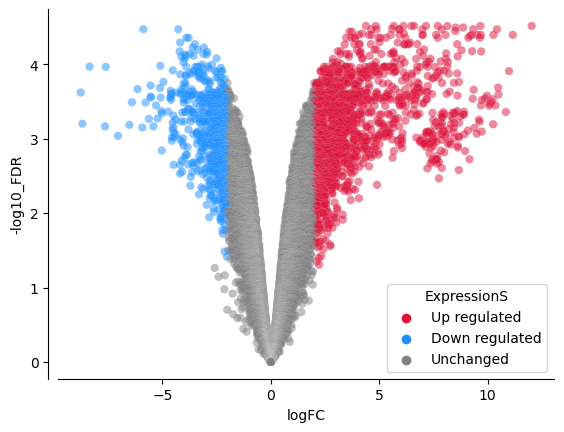

In [23]:
#Volcano plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(direction = 'out', top=False, right = False, bottom = True)
ax.spines['left'].set_position(('axes',-0.02))
sns.scatterplot(x=EDGER_output['logFC'],y=EDGER_output['-log10_FDR'],hue=EDGER_output['ExpressionS'],palette=['crimson','dodgerblue','grey'],linewidth=0.1,alpha=0.5)
plt.xlabel("logFC")
plt.ylabel("-log10_FDR")
plt.savefig('DGE_Genes.png', format='png', dpi=600)
plt.show()

In [25]:
ALL_EDGER=EDGER_output
ALL_EDGER['Gene stable ID'] = ALL_EDGER['Unnamed: 0'].str[:15]
ALL_EDGER= pd.merge(ALL_EDGER,Genes, on=['Gene stable ID'],how='left')
ALL_EDGER.loc[ALL_EDGER['Gene name'] == 'PLXND1']

,Unnamed: 0,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS,Gene stable ID,Gene name
2298,ENSG00000004399.13,-1.738891,9.164633,37.081824,0.000311,0.001963,2.707147,Unchanged,ENSG00000004399,PLXND1


In [ ]:
diff=EDGER_output[EDGER_output['ExpressionS']!='Unchanged']
diff['Gene stable ID'] = diff['Unnamed: 0'].str[:15]
diff_genes= pd.merge(diff,Genes, on=['Gene stable ID'],how='left')
diff_genes.rename(columns = {'Unnamed: 0':'Gene Stable ID version'}, inplace = True)
diff_genes['Set'] = 'Genes'
diff_genes

In [28]:
top_10_rows = diff_genes.nlargest(10, 'logFC')
bottom_10_rows = diff_genes.nsmallest(10, 'logFC')
bottom_10_rows

,Gene Stable ID version,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS,Gene stable ID,Gene name,Set
410,ENSG00000268297.1,-8.768389,0.180016,202.675575,0.000007,0.000240,3.619252,Down regulated,ENSG00000268297,CLEC4GP1,Genes
977,ENSG00000070182.21,-8.689944,0.102351,112.088064,0.000048,0.000629,3.201143,Down regulated,ENSG00000070182,SPTB,Genes
143,ENSG00000161798.7,-8.362887,1.541970,178.254934,0.000001,0.000108,3.968061,Down regulated,ENSG00000161798,AQP5,Genes
1013,ENSG00000236256.9,-7.649046,-0.844020,103.644456,0.000054,0.000683,3.165310,Down regulated,ENSG00000236256,DIAPH2-AS1,Genes
164,ENSG00000166292.12,-7.614955,0.813098,171.243760,0.000001,0.000108,3.965018,Down regulated,ENSG00000166292,TMEM100,Genes
1190,ENSG00000253490.5,-7.050673,-1.351261,83.883893,0.000091,0.000915,3.038691,Down regulated,ENSG00000253490,LINC02099,Genes
990,ENSG00000179772.8,-6.523838,-0.216144,63.042761,0.000050,0.000652,3.185735,Down regulated,ENSG00000179772,FOXS1,Genes
617,ENSG00000265107.3,-6.409380,7.404221,89.314217,0.000014,0.000324,3.489738,Down regulated,ENSG00000265107,GJA5,Genes
368,ENSG00000137225.13,-6.145323,0.163718,115.585164,0.000006,0.000216,3.665837,Down regulated,ENSG00000137225,CAPN11,Genes
1031,ENSG00000166106.4,-5.925925,2.774519,60.698203,0.000057,0.000707,3.150457,Down regulated,ENSG00000166106,ADAMTS15,Genes


In [29]:
diff_transcripts=pd.read_csv('./Thesis/transcript_dge.csv',delimiter=",")
diff_transcripts['Set'] = 'Isoforms'
diff_transcripts

,Transcript stable ID,logFC,logCPM,F,PValue,FDR,ExpressionS,-log10_pvalue,-log10_FDR,Expression,Gene stable ID,Gene name,Transcript name,Set
0,ENST00000642959,12.780077,4.125378,811.750860,2.167146e-07,0.009766,Up regulated,6.664112,2.010272,Changed,ENSG00000180488,MIGA1,MIGA1-204,Isoforms
1,ENST00000264839,7.039579,6.093198,512.347625,8.011904e-07,0.010995,Up regulated,6.096264,1.958821,Changed,ENSG00000079841,RIMS1,RIMS1-201,Isoforms
2,ENST00000324873,6.731188,4.275613,507.867282,8.213959e-07,0.010995,Up regulated,6.085447,1.958821,Changed,ENSG00000176046,NUPR1,NUPR1-201,Isoforms
3,ENST00000378501,11.699566,2.951921,472.861700,1.005704e-06,0.010995,Up regulated,5.997530,1.958821,Changed,ENSG00000101333,PLCB4,PLCB4-204,Isoforms
4,ENST00000381405,5.859298,9.717271,416.006941,1.445443e-06,0.010995,Up regulated,5.839999,1.958821,Changed,ENSG00000164283,ESM1,ESM1-202,Isoforms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,ENST00000549606,-2.213613,3.805707,27.620321,2.202970e-03,0.049943,Down regulated,2.656991,1.301529,Changed,ENSG00000135446,CDK4,CDK4-206,Isoforms
1456,ENST00000590120,-2.727012,0.290874,27.617946,2.203431e-03,0.049943,Down regulated,2.656901,1.301529,Changed,ENSG00000104903,LYL1,LYL1-202,Isoforms
1457,ENST00000221233,-2.810507,2.547509,27.614654,2.204070e-03,0.049943,Down regulated,2.656775,1.301529,Changed,ENSG00000077348,EXOSC5,EXOSC5-201,Isoforms
1458,ENST00000644510,2.649819,5.939862,28.839590,2.206484e-03,0.049957,Up regulated,2.656299,1.301402,Changed,ENSG00000136631,VPS45,VPS45-214,Isoforms


In [30]:
DIFFtranscripts = diff_transcripts[['Gene name']]
DIFFtranscripts = DIFFtranscripts.drop_duplicates(subset=['Gene name'], keep='first')
DIFFtranscripts

,Gene name
0,MIGA1
1,RIMS1
2,NUPR1
3,PLCB4
4,ESM1
...,...
1449,RSAD2
1450,SGTB
1453,P3H2
1454,OIP5


In [33]:
undiff_genes=EDGER_output[EDGER_output['ExpressionS']=='Unchanged']
undiff_genes= pd.merge(undiff_genes,Genes, on=['Gene stable ID'],how='left')
undiff_genes.rename(columns = {'Unnamed: 0':'Gene Stable ID version'}, inplace = True)
undiff_genes['Set'] = 'Genes'
undiff_genes = undiff_genes.drop_duplicates(subset=['Gene name'], keep='first')
undiff_genes

,Gene Stable ID version,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS,Gene stable ID,Gene name,Set
0,ENSG00000119965.13,1.997938,4.455729,1.219770e+02,0.000004,0.000178,3.749821,Unchanged,ENSG00000119965,C10orf88,Genes
1,ENSG00000189221.11,-1.999428,4.609953,1.209175e+02,0.000004,0.000179,3.746457,Unchanged,ENSG00000189221,MAOA,Genes
2,ENSG00000173442.13,-1.973248,3.580344,1.094783e+02,0.000006,0.000220,3.656595,Unchanged,ENSG00000173442,EHBP1L1,Genes
3,ENSG00000105825.14,1.979371,8.530526,1.084465e+02,0.000006,0.000226,3.646772,Unchanged,ENSG00000105825,TFPI2,Genes
4,ENSG00000205808.7,1.965610,4.499304,1.070131e+02,0.000006,0.000233,3.632826,Unchanged,ENSG00000205808,PLPP6,Genes
...,...,...,...,...,...,...,...,...,...,...,...
12387,ENSG00000120942.14,-0.000738,4.046752,1.573098e-05,0.996932,0.997207,0.001215,Unchanged,ENSG00000120942,UBIAD1,Genes
12388,ENSG00000231925.14,0.001510,2.698931,1.306311e-05,0.997206,0.997412,0.001125,Unchanged,ENSG00000231925,TAPBP,Genes
12389,ENSG00000140545.16,-0.000381,5.897467,3.544405e-06,0.998544,0.998681,0.000573,Unchanged,ENSG00000140545,MFGE8,Genes
12390,ENSG00000133131.15,0.000172,4.738438,9.166276e-07,0.999259,0.999328,0.000292,Unchanged,ENSG00000133131,MORC4,Genes


In [35]:
undiff_genes_and_diff_transcripts= pd.merge(undiff_genes,DIFFtranscripts, on=['Gene name'],how='inner')
undiff_genes_and_diff_transcripts

,Gene Stable ID version,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS,Gene stable ID,Gene name,Set
0,ENSG00000189221.11,-1.999428,4.609953,120.917468,0.000004,0.000179,3.746457,Unchanged,ENSG00000189221,MAOA,Genes
1,ENSG00000173442.13,-1.973248,3.580344,109.478301,0.000006,0.000220,3.656595,Unchanged,ENSG00000173442,EHBP1L1,Genes
2,ENSG00000150907.10,1.967888,7.606781,103.117629,0.000007,0.000243,3.613530,Unchanged,ENSG00000150907,FOXO1,Genes
3,ENSG00000162522.11,-1.911671,4.838730,98.790095,0.000008,0.000255,3.593232,Unchanged,ENSG00000162522,KIAA1522,Genes
4,ENSG00000244405.8,1.959280,6.303926,91.848102,0.000011,0.000285,3.545432,Unchanged,ENSG00000244405,ETV5,Genes
...,...,...,...,...,...,...,...,...,...,...,...
285,ENSG00000101266.19,0.030208,7.086160,0.026633,0.874384,0.900602,0.045467,Unchanged,ENSG00000101266,CSNK2A1,Genes
286,ENSG00000189266.13,-0.027285,6.550748,0.024660,0.879083,0.904530,0.043577,Unchanged,ENSG00000189266,PNRC2,Genes
287,ENSG00000163608.15,0.016562,5.072250,0.009611,0.924299,0.939926,0.026906,Unchanged,ENSG00000163608,NEPRO,Genes
288,ENSG00000167380.17,-0.019271,4.298838,0.008673,0.928091,0.943187,0.025402,Unchanged,ENSG00000167380,ZNF226,Genes


In [36]:
top_10_rows = diff_transcripts.nlargest(10, 'logFC')
bottom_10_rows = diff_transcripts.nsmallest(10, 'logFC')
bottom_10_rows

,Transcript stable ID,logFC,logCPM,F,PValue,FDR,ExpressionS,-log10_pvalue,-log10_FDR,Expression,Gene stable ID,Gene name,Transcript name,Set
348,ENST00000548470,-12.049006,5.074742,76.723703,0.000190,0.022075,Down regulated,3.721370,1.656099,Changed,ENSG00000167553,TUBA1C,TUBA1C-203,Isoforms
978,ENST00000537442,-11.398072,2.602182,96.352760,0.001092,0.039706,Down regulated,2.961917,1.401149,Changed,ENSG00000111641,NOP2,NOP2-207,Isoforms
441,ENST00000434555,-11.313359,3.365813,68.095570,0.000259,0.023483,Down regulated,3.586874,1.629245,Changed,ENSG00000117411,B4GALT2,B4GALT2-204,Isoforms
1102,ENST00000542456,-11.142308,2.555885,35.217929,0.001363,0.042791,Down regulated,2.865425,1.368649,Changed,ENSG00000160408,ST6GALNAC6,ST6GALNAC6-213,Isoforms
359,ENST00000647938,-11.097399,2.305331,214.986874,0.000197,0.022303,Down regulated,3.705596,1.651640,Changed,NaN,NaN,NaN,Isoforms
1074,ENST00000170630,-11.082149,3.957964,35.994181,0.001293,0.041936,Down regulated,2.888555,1.377418,Changed,ENSG00000077238,IL4R,IL4R-201,Isoforms
599,ENST00000404032,-10.906401,2.158364,53.444564,0.000482,0.030421,Down regulated,3.317050,1.516827,Changed,ENSG00000119777,TMEM214,TMEM214-203,Isoforms
1069,ENST00000395123,-10.897609,2.284264,36.103283,0.001283,0.041785,Down regulated,2.891771,1.378984,Changed,ENSG00000134802,SLC43A3,SLC43A3-202,Isoforms
1369,ENST00000393352,-10.735737,4.254336,30.163446,0.001982,0.048063,Down regulated,2.702807,1.318191,Changed,ENSG00000115641,FHL2,FHL2-204,Isoforms
13,ENST00000466254,-10.621766,3.457680,296.286396,0.000004,0.010995,Down regulated,5.423894,1.958821,Changed,ENSG00000211772,TRBC2,TRBC2-201,Isoforms


In [37]:
diff_total = pd.concat([diff_genes, diff_transcripts], axis=0)
diff_total

,Gene Stable ID version,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS,Gene stable ID,Gene name,Set,Transcript stable ID,-log10_pvalue,Expression,Transcript name
0,ENSG00000198691.14,5.679302,5.470598,636.217285,5.940917e-09,0.000031,4.514822,Up regulated,ENSG00000198691,ABCA4,Genes,NaN,NaN,NaN,NaN
1,ENSG00000154678.18,6.121331,5.491052,621.013283,6.541461e-09,0.000031,4.514822,Up regulated,ENSG00000154678,PDE1C,Genes,NaN,NaN,NaN,NaN
2,ENSG00000156265.16,4.842675,5.357847,561.784482,9.746654e-09,0.000031,4.514822,Up regulated,ENSG00000156265,MAP3K7CL,Genes,NaN,NaN,NaN,NaN
3,ENSG00000253309.7,12.032557,5.321383,593.564470,1.059912e-08,0.000031,4.514822,Up regulated,ENSG00000253309,SERPINE3,Genes,NaN,NaN,NaN,NaN
4,ENSG00000138207.15,7.700321,3.637689,547.579416,1.161297e-08,0.000031,4.514822,Up regulated,ENSG00000138207,RBP4,Genes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,-2.213613,3.805707,27.620321,2.202970e-03,0.049943,1.301529,Down regulated,ENSG00000135446,CDK4,Isoforms,ENST00000549606,2.656991,Changed,CDK4-206
1456,NaN,-2.727012,0.290874,27.617946,2.203431e-03,0.049943,1.301529,Down regulated,ENSG00000104903,LYL1,Isoforms,ENST00000590120,2.656901,Changed,LYL1-202
1457,NaN,-2.810507,2.547509,27.614654,2.204070e-03,0.049943,1.301529,Down regulated,ENSG00000077348,EXOSC5,Isoforms,ENST00000221233,2.656775,Changed,EXOSC5-201
1458,NaN,2.649819,5.939862,28.839590,2.206484e-03,0.049957,1.301402,Up regulated,ENSG00000136631,VPS45,Isoforms,ENST00000644510,2.656299,Changed,VPS45-214


In [39]:
column_names = ['Chr', 'Start', 'End','Gene Stable ID version','Gene name','Strand','Type'] 
rna_types=pd.read_csv('./Thesis/types_rna.bed',delimiter='\t',header= None,names=column_names)
rna_types['Gene stable ID'] = rna_types['Gene Stable ID version'].str[:15]
rna_types

,Chr,Start,End,Gene Stable ID version,Gene name,Strand,Type,Gene stable ID
0,chr1,11868,14409,ENSG00000290825.1,DDX11L2,+,lncRNA,ENSG00000290825
1,chr1,12009,13670,ENSG00000223972.6,DDX11L1,+,transcribed_unprocessed_pseudogene,ENSG00000223972
2,chr1,14403,29570,ENSG00000227232.5,WASH7P,-,unprocessed_pseudogene,ENSG00000227232
3,chr1,17368,17436,ENSG00000278267.1,MIR6859-1,-,miRNA,ENSG00000278267
4,chr1,29553,31109,ENSG00000243485.5,MIR1302-2HG,+,lncRNA,ENSG00000243485
...,...,...,...,...,...,...,...,...
62698,chrM,14148,14673,ENSG00000198695.2,MT-ND6,-,protein_coding,ENSG00000198695
62699,chrM,14673,14742,ENSG00000210194.1,MT-TE,-,Mt_tRNA,ENSG00000210194
62700,chrM,14746,15887,ENSG00000198727.2,MT-CYB,+,protein_coding,ENSG00000198727
62701,chrM,15887,15953,ENSG00000210195.2,MT-TT,+,Mt_tRNA,ENSG00000210195


In [40]:
DE_RNAs= pd.merge(diff_total, rna_types, on=['Gene stable ID'],how='inner')
DE_RNAs

,Gene Stable ID version_x,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS,Gene stable ID,Gene name_x,...,-log10_pvalue,Expression,Transcript name,Chr,Start,End,Gene Stable ID version_y,Gene name_y,Strand,Type
0,ENSG00000198691.14,5.679302,5.470598,636.217285,5.940917e-09,0.000031,4.514822,Up regulated,ENSG00000198691,ABCA4,...,NaN,NaN,NaN,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding
1,NaN,6.020874,4.721865,200.565775,1.126062e-05,0.013625,1.865649,Up regulated,ENSG00000198691,ABCA4,...,4.948438,Changed,ABCA4-201,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding
2,NaN,8.955611,0.235119,97.913625,8.267831e-04,0.036643,1.436014,Up regulated,ENSG00000198691,ABCA4,...,3.082608,Changed,ABCA4-207,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding
3,NaN,5.421805,-0.582602,35.548230,1.179462e-03,0.040761,1.389754,Up regulated,ENSG00000198691,ABCA4,...,2.928316,Changed,ABCA4-206,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding
4,ENSG00000154678.18,6.121331,5.491052,621.013283,6.541461e-09,0.000031,4.514822,Up regulated,ENSG00000154678,PDE1C,...,NaN,NaN,NaN,chr7,31751178,32428131,ENSG00000154678.18,PDE1C,-,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,NaN,-2.125320,3.476686,27.888135,2.151814e-03,0.049590,1.304603,Down regulated,ENSG00000277258,PCGF2,...,2.667195,Changed,PCGF2-207,chr17,38733897,38749817,ENSG00000277258.5,PCGF2,-,protein_coding
3499,NaN,-8.026503,-0.628295,57.294680,2.157129e-03,0.049590,1.304603,Down regulated,ENSG00000173264,GPR137,...,2.666124,Changed,GPR137-202,chr11,64270061,64289500,ENSG00000173264.15,GPR137,+,protein_coding
3500,NaN,-8.328978,-0.353832,57.280170,2.158096e-03,0.049590,1.304603,Down regulated,ENSG00000067533,RRP15,...,2.665929,Changed,RRP15-202,chr1,218285292,218337983,ENSG00000067533.6,RRP15,+,protein_coding
3501,NaN,-2.417445,4.158196,28.290152,2.166396e-03,0.049708,1.303574,Down regulated,ENSG00000133943,DGLUCY,...,2.664262,Changed,DGLUCY-204,chr14,91060332,91225632,ENSG00000133943.21,DGLUCY,+,protein_coding


In [41]:
# Sample DataFrame with a 'type' column

# Create the 'final' column based on the rules
DE_RNAs['final'] = DE_RNAs['Type'].apply(lambda x: 'small RNAs' if x.endswith('RNA') else ('pseudogene' if x.endswith('pseudogene') else x))

# Update 'final' column for specific categories
DE_RNAs.loc[DE_RNAs['Type'] == 'protein_coding', 'final'] = 'protein_coding'
DE_RNAs.loc[DE_RNAs['Type'] == 'lncRNA', 'final'] = 'lncRNA'
DE_RNAs.loc[~DE_RNAs['Type'].isin(['protein_coding', 'lncRNA', 'tRNA', 'snRNA', 'rRNA', 'piRNA','snoRNA','misc_RNA ','snRNA','Mt_rRNA','Mt_tRNA ' , 'processed_pseudogene', 'transcribed_processed_pseudogene','unprocessed_pseudogene','transcribe_unitary_pseudogene','rRNA_pseudogene','TR_V_pseudogene','translated_processed_pseudogene','transcribed_unprocessed_pseudogene']), 'final'] = 'other'

# Print the updated DataFrame
DE_RNAs

,Gene Stable ID version_x,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS,Gene stable ID,Gene name_x,...,Expression,Transcript name,Chr,Start,End,Gene Stable ID version_y,Gene name_y,Strand,Type,final
0,ENSG00000198691.14,5.679302,5.470598,636.217285,5.940917e-09,0.000031,4.514822,Up regulated,ENSG00000198691,ABCA4,...,NaN,NaN,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding,protein_coding
1,NaN,6.020874,4.721865,200.565775,1.126062e-05,0.013625,1.865649,Up regulated,ENSG00000198691,ABCA4,...,Changed,ABCA4-201,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding,protein_coding
2,NaN,8.955611,0.235119,97.913625,8.267831e-04,0.036643,1.436014,Up regulated,ENSG00000198691,ABCA4,...,Changed,ABCA4-207,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding,protein_coding
3,NaN,5.421805,-0.582602,35.548230,1.179462e-03,0.040761,1.389754,Up regulated,ENSG00000198691,ABCA4,...,Changed,ABCA4-206,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding,protein_coding
4,ENSG00000154678.18,6.121331,5.491052,621.013283,6.541461e-09,0.000031,4.514822,Up regulated,ENSG00000154678,PDE1C,...,NaN,NaN,chr7,31751178,32428131,ENSG00000154678.18,PDE1C,-,protein_coding,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,NaN,-2.125320,3.476686,27.888135,2.151814e-03,0.049590,1.304603,Down regulated,ENSG00000277258,PCGF2,...,Changed,PCGF2-207,chr17,38733897,38749817,ENSG00000277258.5,PCGF2,-,protein_coding,protein_coding
3499,NaN,-8.026503,-0.628295,57.294680,2.157129e-03,0.049590,1.304603,Down regulated,ENSG00000173264,GPR137,...,Changed,GPR137-202,chr11,64270061,64289500,ENSG00000173264.15,GPR137,+,protein_coding,protein_coding
3500,NaN,-8.328978,-0.353832,57.280170,2.158096e-03,0.049590,1.304603,Down regulated,ENSG00000067533,RRP15,...,Changed,RRP15-202,chr1,218285292,218337983,ENSG00000067533.6,RRP15,+,protein_coding,protein_coding
3501,NaN,-2.417445,4.158196,28.290152,2.166396e-03,0.049708,1.303574,Down regulated,ENSG00000133943,DGLUCY,...,Changed,DGLUCY-204,chr14,91060332,91225632,ENSG00000133943.21,DGLUCY,+,protein_coding,protein_coding


In [42]:
df4=DE_RNAs.groupby(['Set','final']).size().reset_index(name='counts')
df5=df4.groupby(['Set','final']).agg({'counts': 'sum'})
df6=df5.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()
df7=df6.pivot(columns = 'final', index = ['Set'], values = 'counts')
df8=df7.reset_index()
df9=df8.set_index('Set')
df9

final,lncRNA,other,protein_coding,pseudogene,small RNAs
Set,,,,,
Genes,20.960076,0.665399,76.045627,2.281369,0.047529
Isoforms,1.143674,0.357398,97.069335,1.429593,NaN


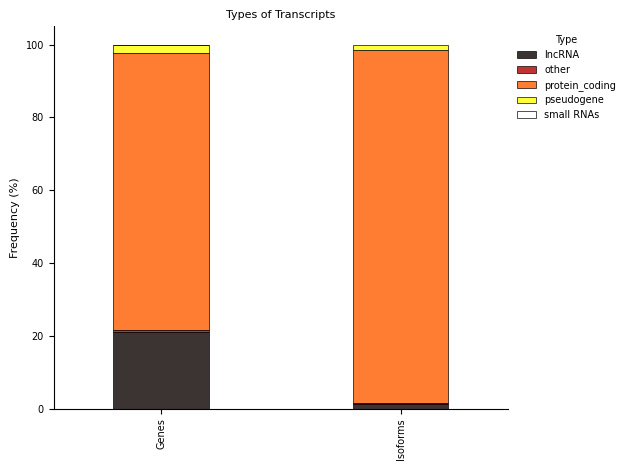

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# plot data in stack manner of bar type "Distribution of RNA molecules in the DEA results with transcripts and genes"
df9.plot(kind='bar', stacked=True,colormap = plt.cm.hot, alpha = 0.8,
                           width = 0.4, edgecolor = 'black', linewidth = 0.6, clip_on = True)

plt.legend(ncol = 1, title = 'Type', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7);
plt.title('Types of Transcripts', fontsize = 8)
plt.ylabel('Frequency (%)', fontsize = 8);
plt.xlabel('')
plt.xticks(rotation = 90, fontsize = 7, ha="center"); plt.yticks(fontsize = 8);
plt.tick_params(axis = 'y', labelsize = 7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('DE_RNAS.png', format='png', dpi=600)
plt.show()

In [44]:
DE_RNAs_g=DE_RNAs[DE_RNAs['Set']=='Genes']
DE_RNAs_g
DE_RNAs_t=DE_RNAs[DE_RNAs['Set']=='Isoforms']
DE_RNAs_t

,Gene Stable ID version_x,logFC,logCPM,F,PValue,FDR,-log10_FDR,ExpressionS,Gene stable ID,Gene name_x,...,Expression,Transcript name,Chr,Start,End,Gene Stable ID version_y,Gene name_y,Strand,Type,final
1,NaN,6.020874,4.721865,200.565775,0.000011,0.013625,1.865649,Up regulated,ENSG00000198691,ABCA4,...,Changed,ABCA4-201,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding,protein_coding
2,NaN,8.955611,0.235119,97.913625,0.000827,0.036643,1.436014,Up regulated,ENSG00000198691,ABCA4,...,Changed,ABCA4-207,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding,protein_coding
3,NaN,5.421805,-0.582602,35.548230,0.001179,0.040761,1.389754,Up regulated,ENSG00000198691,ABCA4,...,Changed,ABCA4-206,chr1,93992833,94121148,ENSG00000198691.14,ABCA4,-,protein_coding,protein_coding
5,NaN,6.385856,4.409021,276.928737,0.000005,0.010995,1.958821,Up regulated,ENSG00000154678,PDE1C,...,Changed,PDE1C-203,chr7,31751178,32428131,ENSG00000154678.18,PDE1C,-,protein_coding,protein_coding
6,NaN,5.759628,4.061472,276.740195,0.000005,0.010995,1.958821,Up regulated,ENSG00000154678,PDE1C,...,Changed,PDE1C-206,chr7,31751178,32428131,ENSG00000154678.18,PDE1C,-,protein_coding,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,NaN,-2.125320,3.476686,27.888135,0.002152,0.049590,1.304603,Down regulated,ENSG00000277258,PCGF2,...,Changed,PCGF2-207,chr17,38733897,38749817,ENSG00000277258.5,PCGF2,-,protein_coding,protein_coding
3499,NaN,-8.026503,-0.628295,57.294680,0.002157,0.049590,1.304603,Down regulated,ENSG00000173264,GPR137,...,Changed,GPR137-202,chr11,64270061,64289500,ENSG00000173264.15,GPR137,+,protein_coding,protein_coding
3500,NaN,-8.328978,-0.353832,57.280170,0.002158,0.049590,1.304603,Down regulated,ENSG00000067533,RRP15,...,Changed,RRP15-202,chr1,218285292,218337983,ENSG00000067533.6,RRP15,+,protein_coding,protein_coding
3501,NaN,-2.417445,4.158196,28.290152,0.002166,0.049708,1.303574,Down regulated,ENSG00000133943,DGLUCY,...,Changed,DGLUCY-204,chr14,91060332,91225632,ENSG00000133943.21,DGLUCY,+,protein_coding,protein_coding


In [45]:
type_counts = DE_RNAs_g['final'].value_counts()
type_percentages = (type_counts / type_counts.sum()) * 100
print(type_counts)
print(type_percentages)

protein_coding    1600
lncRNA             441
pseudogene          48
other               14
small RNAs           1
Name: final, dtype: int64
protein_coding    76.045627
lncRNA            20.960076
pseudogene         2.281369
other              0.665399
small RNAs         0.047529
Name: final, dtype: float64


In [46]:
type_counts = DE_RNAs_t['final'].value_counts()
type_percentages = (type_counts / type_counts.sum()) * 100
print(type_counts)
print(type_percentages)

protein_coding    1358
pseudogene          20
lncRNA              16
other                5
Name: final, dtype: int64
protein_coding    97.069335
pseudogene         1.429593
lncRNA             1.143674
other              0.357398
Name: final, dtype: float64
